## Model misspecification in Bayesian Experimental Design

### Case study: Mössbauer Spectroscopy - Selecting a finite number of velocities ($d_1, _2 , . . . , d_{n_d}$) for high precision measurement of the isomeric shift $\delta$

- Testing implementation of the following paper:
    - [Optimal Bayesian Experimental Design in the Presence of Model Error](https://drive.google.com/file/d/19CqIaQLwhvmL-TZIL7DzOQCStc0EXePV/view?usp=sharing)

The number of detector counts $y_i$ at velocity $d_i$ is described by the following nonlinear model: 
<br>
![True model](true_model.png "True model")
<br>

Here, $h_0$ is the gain of the detector, $h$ is the height of the absorption peak, $\gamma$ is a parameter specifying the width, and $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$ characterizes the observation error. <br>

Clearly, $\delta$ is our parameter of interest, and the remaining variables $\gamma, h, h_0$ are nuisance parameters. To keep our notation consistent with our framework for Bayesian optimal experimental design, let $\theta = (\delta)$ and $ \boldsymbol{\nu} = (\log \gamma, \log h, \log h_0)$.

Following priors are assigned to model parameters: 
<br>
![Parameter priors](priors.png "Parameter priors")
<br>

Here, $\gamma$ and $h$ are assigned to log-normal priors since the height and the width of absorption peak should be non-negative.

Substituting $\theta$ and $\mu$ into the true model, we obtain:
<br>
![Updated model](updated_model.png "Updated model")

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as sp
import seaborn as sns


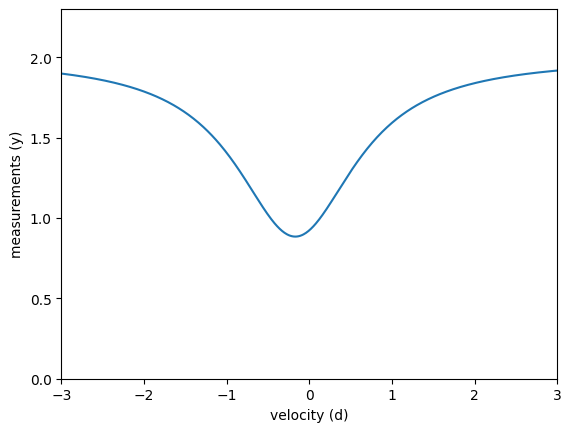

In [2]:
#Defining the priors
theta = np.random.normal(0, 1)
n1 = np.random.normal(0, ((0.1)))
n2 = np.random.normal(0, ((0.2)))
n3 = np.random.normal(2, ((0.1)))

## Simulating the model once
y = []
d = []

for ith in range(-300, 300, 1):
    epsilon = np.random.normal(0, ((0.05)))

    i = ith/100
    yi = n3 - ((math.exp(2*n1+n2))/((theta - i)**2+math.exp(2*n1))) #+ epsilon
    d.append(i)
    y.append(yi)

plt.xlabel("velocity (d)")
plt.ylabel("measurements (y)")
plt.ylim(0, 2.3)
plt.xlim(-3, 3)
plt.plot(d, y)

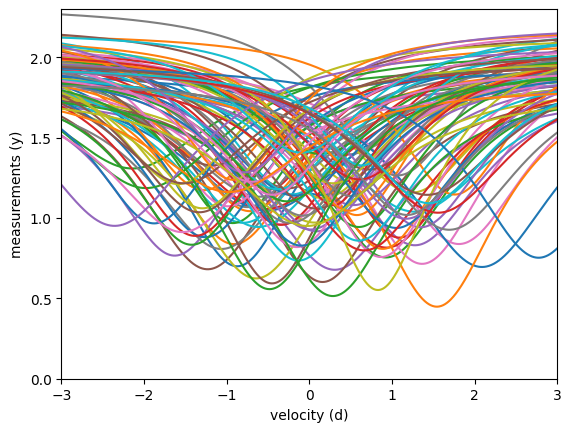

In [3]:
## Simulating the model M times with N different velocities
N = 1000
M = 100
y = np.zeros(shape = (N, M))
d = np.linspace(-3, 3, N)

for j in range(0, M):
    theta = np.random.normal(0, 1)
    n1 = np.random.normal(0, ((0.1)))
    n2 = np.random.normal(0, ((0.2)))
    n3 = np.random.normal(2, ((0.1)))

    for i in range(N):
        #epsilon = np.random.normal(0, ((0.05)))
        y[i, j] = n3 - ((np.exp(2*n1+n2))/((theta - d[i])**2+np.exp(2*n1))) #+ epsilon

    plt.plot(d, y[:, j])

plt.xlabel("velocity (d)")
plt.ylabel("measurements (y)")
plt.ylim(0, 2.3)
plt.xlim(-3, 3)

plt.show()


Comparing our simulation with the simulation in the paper which is show below, we can say that they look similiar although ours don't have the sharp peaks towards the lower measurement (y) values.
<br>
![Paper's simulation](essay_simulation.png "Paper's simulation")

Since we have a simulation that at least somewhat resembles the actual model, let's see if in an simulation environment our model converges to the true theta point that we assumed. <br>

Here, we can observe the difference between a the measurements for a randomly sampled theta value against the true theta value which is assumed to be 0.

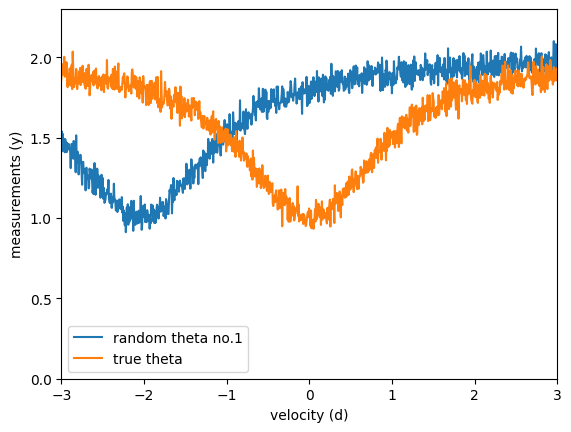

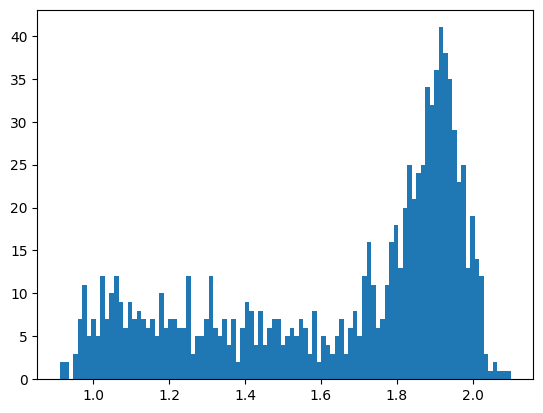

ShapiroResult(statistic=0.864087700843811, pvalue=1.4849707095090357e-28)
Kolmogorov-Smirnov Test (Poisson): D = 0.47857200890227203, p-value = 4.606532818208895e-211


In [4]:
## Simulating the model 1 time with random theta, 1 time with assumed true theta
N = 1000
M = 2
y = np.zeros(shape = (N, M))
d = np.linspace(-3, 3, N)

#Priors except theta are not randomly sampled, they are fixed for the sake of simulation simplification
n1 = 0
n2 = 0
n3 = 2

true_theta = 0

## Modelling random theta values
for j in range(0, M - 1):
    theta = np.random.normal(0, 1)
    for i in range(N):   
        epsilon = np.random.normal(0, ((0.05)))
        y[i, j] = n3 - ((np.exp(2*n1+n2))/((theta - d[i])**2+np.exp(2*n1))) + epsilon
    plt.plot(d, y[:, j], label="random theta no." + str(j+1))   

# Modelling true theta value
for i in range(N):
        epsilon = np.random.normal(0, ((0.05)))
        y[i, M - 1] = n3 - ((np.exp(2*n1+n2))/((true_theta - d[i])**2+np.exp(2*n1))) + epsilon
plt.plot(d, y[:, M-1], label="true theta")    
    
plt.xlabel("velocity (d)")
plt.ylabel("measurements (y)")
plt.ylim(0, 2.3)
plt.xlim(-3, 3)
plt.legend()

plt.show()

# Defining the random theta data for distribution test
data = y[:,0]

#Drawing the histogram of data
plt.hist(data, bins=100)
plt.show()

#Shapiro-Wilks normality test
print(sp.stats.shapiro(y[:,0]))

#Kolmogorov-Smirnov test for Poisson
mu = np.mean(data)

d_poisson, p_value_ks_poisson = sp.stats.kstest(data, 'poisson', args=(mu,))
print(f"Kolmogorov-Smirnov Test (Poisson): D = {d_poisson}, p-value = {p_value_ks_poisson}")



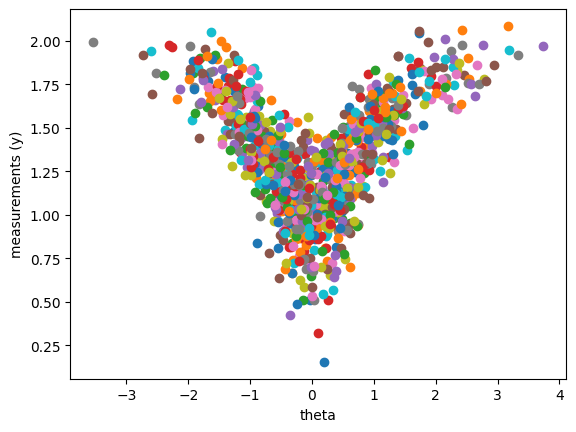

[1.24026515 0.96233471 1.19468296 1.4351408  1.67528716 0.95054516
 1.18435854 1.15524817 1.39805912 1.23640942 1.39739281 0.80979333
 1.17751432 1.51570111 1.45607041 1.39466114 0.76418722 1.04238237
 1.16745481 0.96562264 1.88428004 1.21149571 1.47606663 1.01272501
 1.35685098 1.95412252 1.73133847 1.18359394 1.43126933 0.93927399
 0.81427385 1.12649251 0.95469708 1.31353346 1.40569181 1.0565113
 0.94274597 1.07740084 1.6052775  1.94861784 1.10210521 0.99629095
 1.07790008 1.49767186 1.47710987 1.40936465 1.6868478  1.75429085
 0.94814649 1.25093863 1.09581456 0.96700471 1.60901188 1.54118815
 1.04775679 1.10261174 1.43159172 1.14092435 1.08159785 1.57580991
 2.04397933 1.10526403 1.26049736 1.09748733 1.59761192 1.84865811
 1.06064271 1.91780571 1.56291038 1.18128069 0.51324353 0.9415518
 1.54640287 1.51460907 1.97242178 1.46715875 1.26487199 1.08723229
 1.23114379 0.98204003 1.33900074 0.73437002 1.25338333 1.74315881
 1.01157567 1.3731922  1.57469475 1.73858129 0.96577394 0.987110

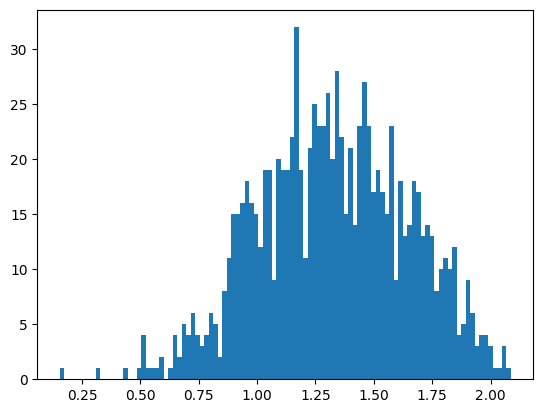

ShapiroResult(statistic=0.9947785139083862, pvalue=0.0015812658239156008)
Kolmogorov-Smirnov Test (Poisson): D = 0.45187606589936247, p-value = 5.924931306212386e-187


In [5]:
## Simulating the model 1000 times with random theta and fixed distance of d
N = 1
M = 1000
y = np.zeros(shape = (N, M))
d = 0
theta_set = np.zeros(shape = (M))

## Modelling random theta values
for j in range(0, M):
    theta = np.random.normal(0, 1)
    n1 = np.random.normal(0, ((0.1)))
    n2 = np.random.normal(0, ((0.2)))
    n3 = np.random.normal(2, ((0.1)))
    theta_set[j] = theta 
    for i in range(N):
        epsilon = np.random.normal(0, ((0.05)))
        y[i, j] = n3 - ((np.exp(2*n1+n2))/((theta - d)**2+np.exp(2*n1))) + epsilon
    plt.scatter(theta, y[:, j])    


    
plt.xlabel("theta")
plt.ylabel("measurements (y)")

plt.show()

# Defining the random theta data for distribution test
data = y[0, :].flatten()
print(data)


#Drawing the histogram of data
plt.hist(data, bins=100)
plt.show()

#Shapiro-Wilks normality test
print(sp.stats.shapiro(data))

#Kolmogorov-Smirnov test for Poisson
mu = np.mean(data)

d_poisson, p_value_ks_poisson = sp.stats.kstest(data, 'poisson', args=(mu,))
print(f"Kolmogorov-Smirnov Test (Poisson): D = {d_poisson}, p-value = {p_value_ks_poisson}")



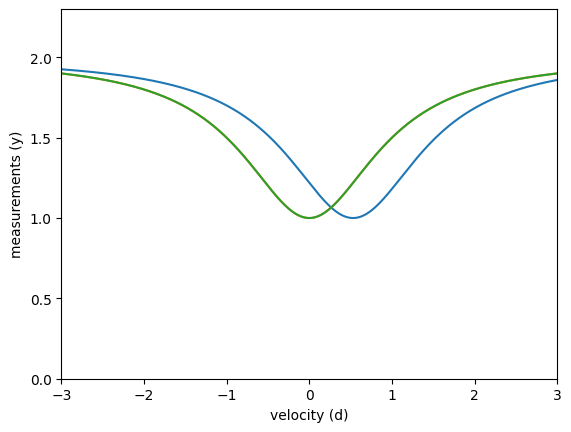

0.5294150955345212
0.0
0


In [6]:
## Simulating the model with prior, posterior and true theta value
N = 1000
M = 3
y = np.zeros(shape = (N, M))
d_range = np.linspace(-3, 3, N)

#Priors except theta are not randomly sampled, they are fixed for the sake of simulation simplification
n1 = 0
n2 = 0
n3 = 2
true_theta = 0

# Defining likelihood function and calculating posterior - Likelihood is Poisson distributed

def likelihood(theta, y_val, n1, n2, n3, d):
    lambda_val = n3 - ((np.exp(2*n1+n2))/((theta - d)**2+np.exp(2*n1)))
    likelihood_val = sp.stats.poisson.pmf(y_val, mu=lambda_val)
    return likelihood_val

def posterior(theta, y_val, n1, n2, n3, d):
    posterior_val = likelihood(theta, y_val, n1, n2, n3, d) * sp.stats.norm.pdf(theta)
    return posterior_val

# Measurements for the prior
theta = np.random.normal(0, 1)
for i in range(N):   
    #epsilon = np.random.normal(0, ((0.05)))
    y[i, 0] = n3 - ((np.exp(2*n1+n2))/((theta - d_range[i])**2+np.exp(2*n1))) #+ epsilon
plt.plot(d_range, y[:, 0])

# Measurements for posterior
posterior_val = np.zeros(N)
for i in range(len(d_range)):
    posterior_val[i] = posterior(theta, y[i,0], n1, n2, n3, d_range[i])
posterior_theta = np.mean(posterior_val)
for i in range(N):
    #epsilon = np.random.normal(0, ((0.05)))
    y[i, 1] = n3 - ((np.exp(2*n1+n2))/((posterior_theta - d_range[i])**2+np.exp(2*n1))) #+ epsilon
plt.plot(d_range, y[:, 1])

# Measurements for true theta
for i in range(N):
    #epsilon = np.random.normal(0, ((0.05)))
    y[i, 2] = n3 - ((np.exp(2*n1+n2))/((true_theta - d_range[i])**2+np.exp(2*n1))) #+ epsilon
plt.plot(d_range, y[:, 2])

plt.xlabel("velocity (d)")
plt.ylabel("measurements (y)")
plt.ylim(0, 2.3)
plt.xlim(-3, 3)

plt.show()

print(theta)
print(posterior_theta)
print(true_theta)

Unfortunately, likelihood function is not readily available in the paper which this study is based. After a little bit of research, we found a GitHub repository that the author of this paper created where he also had a example of Mössbauer spectroscopy. <br>

There, he made some assumptions regarding the nuisance parameters and fixed them to integer values, though, he stated a log-likelihood formula that can be used going forward. <br>

You can reach the GitHub repository [here.](https://github.com/chi-feng/soed) <br>

According to this in our data generating model the fixed nuisance parameters are $h_0 = 1, h = 1,$ and $\gamma^2 = 0.1$.

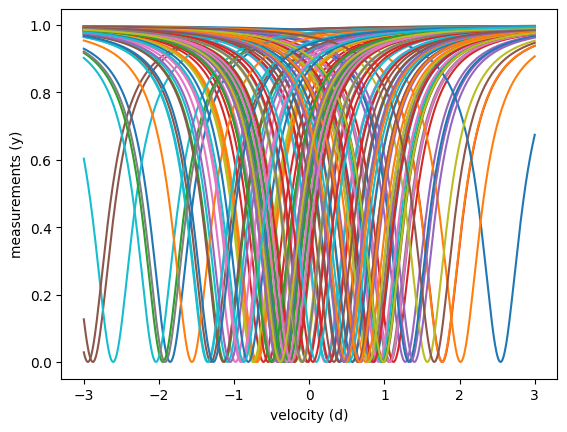

In [7]:
#Here is the data generated by the data generating function without the noise and with fixed nuisance parameters.

## Simulating the model M times with N different velocities
N = 1000
M = 100
y = np.zeros(shape = (N, M))
d = np.linspace(-3, 3, N)

for j in range(0, M):
    theta = np.random.normal(0, 1)
    gamma_square = 0.1
    h = 1.0
    h_0 = 1.0

    for i in range(N):
        #epsilon = np.random.normal(0, ((0.05)))
        y[i, j] = (h_0 - ((h*gamma_square) / ((theta - d[i]) * (theta - d[i]) + gamma_square))) #+ epsilon

    plt.plot(d, y[:, j])

plt.xlabel("velocity (d)")
plt.ylabel("measurements (y)")
plt.show()


In [35]:
#Defining the data generating formula

def data_generate(d):
    N = 1
    M = 1000
    y = np.zeros(shape = (N, M))
    d = np.linspace(-3, 3, N)

    for j in range(0, M):
        theta = np.random.normal(0, 1)
        gamma_square = 0.1
        h = 1.0
        h_0 = 1.0

        for i in range(N):
            #epsilon = np.random.normal(0, ((0.05)))
            y[i, j] = (h_0 - ((h*gamma_square) / ((theta - d[i]) * (theta - d[i]) + gamma_square))) #+ epsilon

    return y

# Defining the Log Likelihood and related functions for Mössbauer spectroscopy
noise_variance = 0.01
log_constant = math.log(2 * math.pi * noise_variance)

def evaluate(theta, control):
    gamma_square = 0.1
    h = 1.0
    h_0 = 1.0
    return (h_0 - ((h*gamma_square) / ((theta - control) * (theta - control) + gamma_square)))

def loglikelihood(theta, control):
    output = evaluate(theta, control)
    disturbance = disturbance_func(theta, control)
    return -0.5 * log_constant - (output - disturbance) * (output - disturbance) / (2 * noise_variance)

def disturbance_func(theta, control):
    return evaluate(theta, control) + np.random.normal(0, noise_variance) * math.sqrt(noise_variance) 

In [36]:
# Creating the data
d_val = 2

data = data_generate(d_val)

def mcmc_mossbauer(data, iteration, theta_initial, proposal_sd, theta_prior_mu, theta_prior_sd, likelihood_sd, control_d):

    # We will start by initializing our mu value and adding it to the list of posteriors as a starting point
    theta_current = theta_initial
    posterior = [theta_current]

    #For given number of iterations, we will sample a posterior and accept it if it meets the criteria
    for i in range(iteration):
        theta_proposed = sp.stats.norm(theta_prior_mu, theta_prior_sd).rvs()

        # We compute the likelihood value for our current mu and proposed mu
        likelihood_current = np.exp(loglikelihood(theta_current, control_d))
        print(likelihood_current)
        likelihood_proposed = np.exp(loglikelihood(theta_proposed, control_d))
        print(likelihood_proposed)

        # We compute the prior probability of current and proposed mu
        theta_probability_current = sp.stats.norm(theta_prior_mu, theta_prior_sd).pdf(theta_current)
        theta_probability_proposed = sp.stats.norm(theta_prior_mu, theta_prior_sd).pdf(theta_proposed)

        # We calculate the nominator of the Bayes formula for both current and proposed values
        nominator_current = likelihood_current * theta_probability_current
        nominator_proposed = likelihood_proposed * theta_probability_proposed

        # We calculate the acceptance probability by dividing the two probabilities. This also helps us avoid denominator integration
        accept_probability = min((nominator_proposed / nominator_current), 1)

        accept =  np.random.rand() < accept_probability

        # If we accept the proposal, we update the current mu value and add it to the list of posteriors
        if accept:
            theta_current = theta_proposed

        posterior.append(theta_current)
    
    return posterior

# Running the sampler
posterior_list = mcmc_mossbauer(data=data, iteration=25, theta_initial=np.random.normal(0, 1), proposal_sd=0.5, theta_prior_mu=0, theta_prior_sd=1, likelihood_sd=1, control_d=d_val)

3.9891734647857704
3.989409908664422
3.9891975357301415
3.9893061475300824
3.9894029708317924
3.988791493559767
3.98921140831959
3.9893252140646474
3.989399331819475
3.9892019877226
3.9894017657802294
3.989419397325081
3.989271546822603
3.9894093147181686
3.989278040394549
3.989410151096907
3.989298055690637
3.9893580244361226
3.9894021722491386
3.9893063223163243
3.988792639589439
3.9893939765646045
3.9893689042011995
3.9893983390114016
3.9894181246596636
3.9894200044437804
3.9892002321863855
3.9891279214150788
3.989370954135872
3.9893060114472005
3.988178144223875
3.9893051537336066
3.989042591384335
3.9890968328828222
3.9894173795331414
3.988996867597253
3.9890194947607567
3.989394369633607
3.989395586659867
3.9890555695094303
3.9894133562872818
3.989228084645789
3.9890644744235333
3.989422798867249
3.9893649973909397
3.989422493331383
3.9893560115155835
3.989387376973374
3.9894149407766903
3.989052348477898


/var/folders/hk/_g475vss66n_f_6s0_3sdxk40000gn/T/ipykernel_6349/1232656554.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(posterior[500:], ax=ax, label='estimated posterior')


Text(0.5, 1.0, 'Analytical posterior vs Estimated posterior')

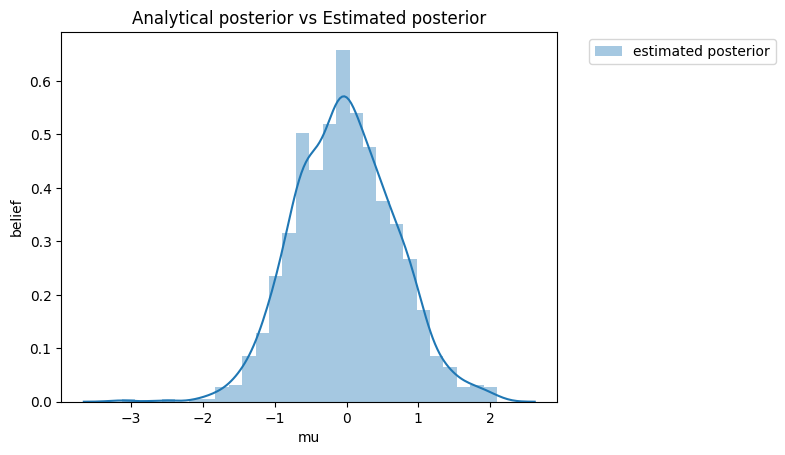

In [31]:
data = data_generate(d_val)

posterior = mcmc_mossbauer(data=data, iteration=1500, theta_initial=np.random.normal(0, 1), proposal_sd=0.5, theta_prior_mu=0, theta_prior_sd=1, likelihood_sd=1, control_d=d_val)

fig, ax = plt.subplots()

sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x = np.linspace(-.5, .5, 1000)
_ = ax.set(xlabel='mu', ylabel='belief')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Analytical posterior vs Estimated posterior")


Here, the model discrepancy term $\delta(d)$ can be represented as zero-mean Gaussian process. 
<br>
![Model discrepancy term](model_discrepancy_term.png "Model discrepancy term")
<br>
<br>
It will have the squared exponential correlation function.
<br>
![Exponential correlation function](exponential_correlation_func.png "Exponential correlation function")

In [5]:
## Gaussian Process
sigma_val = 1.0

def correlation(di: float, dj: float, sigma: float, L: float):
    corr = pow(sigma, 2) * math.exp(-pow(((di-dj) / L), 2))
    return corr

def delta(di_val, dj_val):
    delta_val = np.random.normal(0, correlation(di = di_val, dj = dj_val, sigma = sigma_val, L = 0.3))
    return delta_val

delta(1.0, 0.5)

0.0002543077053966499

We need to utilise the Monte-Carlo method to estimate expected utility function:<br>
![Monte-Carlo Estimator](monte_carlo_estimator.png "Monte-Carlo Estimator")

In [6]:
## Implementing the Monte Carlo Sampling to estimate utility function


def monte_carlo(d: float, N: float, M1: float, M2: float):
    total_sum = 0
    for nn in range(0, N):
        m1_sum = 0
        for m1 in range(0, M1):
            ## Define the operations accordingly (Optimal Bayesian Exp Design - pg. 38)
            operation_1 = 0
            m1_sum = m1_sum + operation_1

            ## Assigning the final value to m1_sum
            m1_sum = math.log(m1_sum / M1)
        
        m2_sum = 0
        for m2 in range(0, M2):
            ## Define the operations accordingly (Optimal Bayesian Exp Design - pg. 38)
            operation_2 = 0
            m2_sum = m2_sum + operation_2

            ## Assigning the final value to m2_sum
            m2_sum = math.log(m2_sum / M2) 
        
        total_sum = (m1_sum - m2_sum)
    return total_sum / N